Enter the name of country India
Do you want to enter another country, 1 for yes, 0 for no 1
Enter the name of country Japan
Do you want to enter another country, 1 for yes, 0 for no 1
Enter the name of country Spain
Do you want to enter another country, 1 for yes, 0 for no 1
Enter the name of country United.Kingdom
Do you want to enter another country, 1 for yes, 0 for no 1
Enter the name of country 
1. 
The constructed path to load the file is  countries\India.txt
The constructed path to load the file is  countries\Japan.txt
The constructed path to load the file is  countries\Spain.txt
The constructed path to load the file is  countries\United.Kingdom.txt
The constructed path to load the file is  countries\United.States.txt
The constructed path to load the file is  countries\World.txt


2. 
The five most popular feelings in India with their respective hexadecimal colors are:
better  : 3501   #FFA401
right  : 2939   #E97802
well  : 1859   #E6C637
good  : 1647   #FFF700
different  : 812

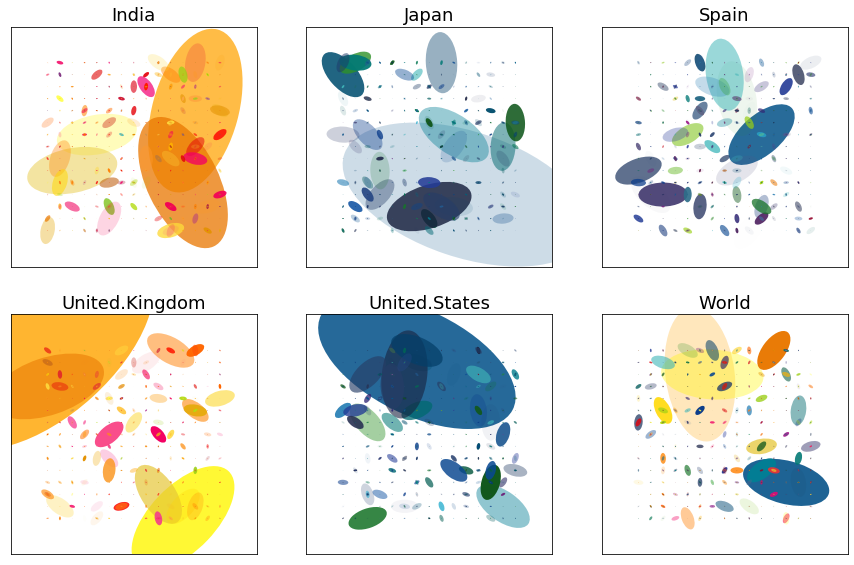


 4. 

For this assignment five countries Afghanistan,India,Spain,United Kingdom and United States were 
chosen for plotting their respective ellipses generated by each country’s feelings and therefore 
classifying them as optimistic or pessimistic. According to the plots generated it was observed 
that the countries showed contrasting results.
While plots of India and United Kingdom comprised mainly of lighter, brighter and happier colours 
such as yellows and oranges, thus showing the country’s optimistic nature, 
United States and Spain plots consisted of darker colours such as greys and blues, 
thus showing the pessimistic nature of both countries.
On the other hand Afghanistan’s plot encompassed both light and dark colours, but since it mostly had 
lighter colours Afghanistan should be classified as Optimistic in nature.




In [1]:
import numpy as np
import pandas as pd
import glob, random
from pylab import figure, show, rand
from matplotlib.patches import Ellipse

#Creating an empty list to store input given from user
input_countries=[]

#Function to take input for 5 countries or less
def takeInput(input_countries):
    for i in range(5):
        country = input("Enter the name of country ")
        if country is not "":
            country = country.lower()
            country = country.replace(" ",".")
            input_countries.append(country)
        
        #If no input is five, united states is chosen as default
        else:
            default = "united.states"
            input_countries.append(default)
        if i<4:
            more = input("Do you want to enter another country, 1 for yes, 0 for no ")
            if(more=="1"):
                continue
            else:
                break


takeInput(input_countries)
input_countries.append("world")

data = {}
print("1. ") 
for file in glob.glob("countries/*.txt"):
    
    name = (file.split("\\")[1].split(".txt")[0])
    
    if name.casefold() in input_countries:
        print("The constructed path to load the file is ", file)
        #If the country has a feeling file in the given dataset, it will load the file
        with open("{}".format(file),'r') as country:
            #data is a dictionary mapping the feelings to its country
            data[name]=[]
            for lines in country:
                feeling=lines.split(";")
                data[name].append(feeling)
print("\n")               
with open("feelings.txt",'r') as file:
    lines = file.readlines()[1:]

#feelings is a dictionary with the feeling name as key and its corresponding hexadecimal color as value 
feelings = {}
for line in lines:
    feelings[line.split("\t")[0]]=["#"+line.split("\t")[2].split("\n")[0]]
#keys is a list with all the feeling names of feeligs.txt file
keys=[]
for feel in feelings.keys():
    keys.append(feel)     
#names is a list with the country names we want to plot the ellipses for    
names=[]
for country in data.keys():
    names.append(country)
#dic is a nested dictionary which contains the frequence of every feeling of feeling.txt file in each country    
dic={ name:{ key:[] for key in keys} for name in names}

for country in data.keys():
    for key in dic[country].keys():        
        if key in data[country][0]:
            count=data[country][0].count(key)
            dic[country][key] = [count]
        else:
            dic[country][key] = [0]

#Code to print the frequency of each feeling in every country. Please uncomment if you want
"""
for country in dic.keys():
    print(country)
    for key in dic[country].keys():
        print(key, (dic[country][key]), sep = "\t")
"""

#freq is a dictionary containing frequency of all feelings across the 5 countries including the base query            
print("2. ")

freq = {}
count = 0
for feeling in keys:
    count=0
    for country in names:
        
        count = count + dic[country][feeling][0]
        freq[feeling] = [count]
max_key = max(freq, key=freq.get)


#Code to print 5 most popular feelings in each country
from collections import Counter 

for i in names[:-1]:
    k = Counter(dic[i])
    high = k.most_common(5) 
    print("The five most popular feelings in %s with their respective hexadecimal colors are:"%i) 
    for j in high: 
        print(j[0]," :",j[1][0]," ",feelings[j[0]][0])
    print("\n")

#max_key is the most popular feeling with highest frequency
if max_key is None:
    print("No feeling mined")
else:
    print("The most popular feeling across all the countries including world is '%s' with the frequency of %d \n"%(max_key, freq[max_key][0],))

    
print("3. ")
#Code to plot the ellipses as of each country as subplots
fig = figure(figsize=(15,15))
for num,i,country in zip(range(1,7),range(len(names)),dic.keys()):
    
    ax = fig.add_subplot(3,3,num)
    for j,key in zip(range(len(keys)),dic[country].keys()):
        
        e = Ellipse((random.randint(2, 16),random.randint(2, 16)), width=dic[country][key][0]*0.004, height=dic[country][key][0]*0.002, angle=random.randint(0,180),facecolor=feelings[key][0]) 
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(rand())
        ax.set_xlim(-1,19 )
        ax.set_ylim(-1,19)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(names[i],fontsize=18)
show()

summary="""
For this assignment five countries Afghanistan,India,Spain,United Kingdom and United States were 
chosen for plotting their respective ellipses generated by each country’s feelings and therefore 
classifying them as optimistic or pessimistic. According to the plots generated it was observed 
that the countries showed contrasting results.
While plots of India and United Kingdom comprised mainly of lighter, brighter and happier colours 
such as yellows and oranges, thus showing the country’s optimistic nature, 
United States and Spain plots consisted of darker colours such as greys and blues, 
thus showing the pessimistic nature of both countries.
On the other hand Afghanistan’s plot encompassed both light and dark colours, but since it mostly had 
lighter colours Afghanistan should be classified as Optimistic in nature.

"""

print("\n 4. ")
print(summary)